In [51]:
# First lets import the packages that we will use in this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
# Now lets read in the data

df = pd.read_csv('tv_series.csv')

In [54]:
# Now lets take a look at the data

df.head()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."


In [55]:
df.tail()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
49995,Law & Order: Special Victims Unit,(1999– ),60 min,"Crime, Drama, Mystery",8.1,"Mariska Hargitay, Christopher Meloni, Ice-T, D...","This series follows the Special Victims Unit, ..."
49996,Doctor Who,(2005– ),45 min,"Adventure, Drama, Sci-Fi",8.6,"Jodie Whittaker, Peter Capaldi, Pearl Mackie, ...",The further adventures in time and space of th...
49997,The Lord of the Rings: The Rings of Power,(2022– ),****,"Action, Adventure, Drama",6.9,"Morfydd Clark, Ismael Cruz Cordova, Charlie Vi...",Epic drama set thousands of years before the e...
49998,The Bear,(2022– ),30 min,"Comedy, Drama",8.4,"Jeremy Allen White, Ebon Moss-Bachrach, Ayo Ed...",A young chef from the fine dining world return...
49999,Supernatural,(2005–2020),44 min,"Drama, Fantasy, Horror",8.4,"Jared Padalecki, Jensen Ackles, Jim Beaver, Mi...",Two brothers follow their father's footsteps a...


In [1]:
# Data cleaning

In [56]:
df.rename(columns = {'Series Title':'series_title'}, inplace = True)

In [57]:
df.shape

(50000, 7)

In [58]:
# We need to check if we have any missing data

df.isnull().sum()

series_title      0
Release Year    200
Runtime           0
Genre             0
Rating            0
Cast             91
Synopsis          0
dtype: int64

In [59]:
# Check for Duplicate values

df[df.duplicated()]

,series_title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
10000,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
10001,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
10002,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
10003,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
10004,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."
...,...,...,...,...,...,...,...
49995,Law & Order: Special Victims Unit,(1999– ),60 min,"Crime, Drama, Mystery",8.1,"Mariska Hargitay, Christopher Meloni, Ice-T, D...","This series follows the Special Victims Unit, ..."
49996,Doctor Who,(2005– ),45 min,"Adventure, Drama, Sci-Fi",8.6,"Jodie Whittaker, Peter Capaldi, Pearl Mackie, ...",The further adventures in time and space of th...
49997,The Lord of the Rings: The Rings of Power,(2022– ),****,"Action, Adventure, Drama",6.9,"Morfydd Clark, Ismael Cruz Cordova, Charlie Vi...",Epic drama set thousands of years before the e...
49998,The Bear,(2022– ),30 min,"Comedy, Drama",8.4,"Jeremy Allen White, Ebon Moss-Bachrach, Ayo Ed...",A young chef from the fine dining world return...


In [60]:
# Drop the duplicate values

df.drop(df[df.duplicated()].index,axis=0,inplace=True)

In [61]:
df[df.duplicated()]

,series_title,Release Year,Runtime,Genre,Rating,Cast,Synopsis


In [62]:
# Drop the null values

df=df.dropna()

In [63]:
df.isnull().sum()

series_title    0
Release Year    0
Runtime         0
Genre           0
Rating          0
Cast            0
Synopsis        0
dtype: int64

In [64]:
# Now lets check the data types for our data

df.dtypes

series_title    object
Release Year    object
Runtime         object
Genre           object
Rating          object
Cast            object
Synopsis        object
dtype: object

In [65]:
# Let us remove the column we wont be using for our analysis


df.drop(['Synopsis'],axis=1,inplace=True)

In [66]:
df

,series_title,Release Year,Runtime,Genre,Rating,Cast
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ..."
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ..."
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,..."
...,...,...,...,...,...,...
9998,"Diomedes, el Cacique de La Junta",(2015– ),****,Drama,7.1,"Paula Castaño, Kimberly Reyes, Alejandra Miran..."
9999,MasterChef: The Professionals,(2008– ),****,Reality-TV,7.7,"Gregg Wallace, Michel Roux Jr., Sean Pertwee, ..."
34484,The Office,(2005– ),22 min,Comedy,9.0,"Steve Carell, Jenna Fischer, John Krasinski, R..."
39043,Peaky Blinders,(2013– ),60 min,"Crime, Drama",8.8,"Cillian Murphy, Paul Anderson, Sophie Rundle, ..."


In [67]:
df['Genre'].unique()

array(['Comedy, Crime, Fantasy', 'Drama, Western', 'Comedy, Drama',
       'Action, Drama, Thriller', 'Crime, Drama',
       'Action, Drama, Mystery', 'Action, Adventure, Crime',
       'Action, Adventure, Drama', 'Drama, Horror, Thriller',
       'Comedy, Drama, Romance', 'Drama, Thriller',
       'Adventure, Drama, Family', 'Fantasy, Horror', 'Drama, Mystery',
       'Crime, Drama, Thriller', 'Drama, Fantasy, Horror',
       'Biography, Drama, History', 'Crime, Drama, Mystery',
       'Drama, Mystery, Sci-Fi', 'Crime', 'Drama, Mystery, Thriller',
       'Action, Comedy, Crime', 'Action, Adventure, Mystery', 'Drama',
       'Comedy', 'Drama, Romance', 'Documentary, Drama, History',
       'Comedy, Drama, Sport', 'Adventure, Drama, Sci-Fi',
       'Comedy, Romance', 'Animation, Action, Adventure',
       'Action, Crime, Drama', 'Animation, Adventure, Comedy',
       'Action, Adventure, Comedy', 'Drama, Horror, Sci-Fi',
       'Comedy, Crime, Drama', 'Drama, Sci-Fi, Thriller',
       'C

In [68]:
df.drop(df[df.Genre=='****'].index,inplace=True)

In [69]:
df['Rating'].unique()

array(['8.2', '8.7', '7.9', '8.6', '8.0', '8.3', '7.7', '7.5', '5.3',
       '****', '7.4', '8.1', '9.2', '6.9', '7.8', '8.4', '6.8', '8.5',
       '9.5', '8.9', '6.0', '5.0', '9.0', '7.2', '9.1', '7.3', '7.6',
       '8.8', '6.7', '7.1', '6.6', '6.5', '9.3', '5.4', '5.7', '7.0',
       '4.9', '6.1', '9.6', '5.2', '5.8', '4.8', '5.9', '5.6', '6.4',
       '4.7', '5.5', '6.3', '6.2', '5.1', '4.1', '3.4', '3.7', '4.4',
       '4.6', '2.8', '2.4', '4.2', '2.5', '3.6', '3.5', '3.8', '3.2',
       '4.0', '3.9', '9.4', '4.5', '9.7', '2.6', '4.3', '3.0', '3.3',
       '2.9', '2.3', '3.1', '2.7', '1.6', '2.2', '1.7', '1.0', '1.9',
       '1.4', '1.1', '2.1', '2.0', '1.8'], dtype=object)

In [70]:
df.drop(df[df.Rating =='****'].index,inplace=True)

In [71]:
# change the data type of 'Rating' from object to float


df['Rating']=df['Rating'].astype('float64')

In [72]:
df['Runtime'].unique()

array(['45 min', '60 min', '40 min', '50 min', '55 min', '****', '44 min',
       '57 min', '30 min', '58 min', '49 min', '51 min', '42 min',
       '46 min', '52 min', '22 min', '54 min', '41 min', '43 min',
       '23 min', '27 min', '90 min', '312 min', '25 min', '59 min',
       '24 min', '332 min', '53 min', '100 min', '48 min', '120 min',
       '88 min', '62 min', '61 min', '80 min', '70 min', '47 min',
       '28 min', '7 min', '35 min', '15 min', '21 min', '38 min',
       '89 min', '56 min', '81 min', '75 min', '36 min', '280 min',
       '33 min', '93 min', '378 min', '328 min', '95 min', '20 min',
       '527 min', '11 min', '82 min', '71 min', '32 min', '561 min',
       '63 min', '566 min', '26 min', '98 min', '37 min', '16 min',
       '29 min', '180 min', '10 min', '105 min', '403 min', '115 min',
       '178 min', '300 min', '415 min', '335 min', '12 min', '65 min',
       '341 min', '325 min', '150 min', '130 min', '321 min', '67 min',
       '31 min', '461 min', '174

In [73]:
df.drop(df[df.Runtime =='****'].index,inplace=True)

In [74]:
df['Runtime']=df['Runtime'].str.replace("min"," ")

In [75]:
df['Runtime']=df['Runtime'].str.strip()

In [76]:
df['Runtime'].unique()

array(['45', '60', '40', '50', '55', '44', '57', '30', '58', '49', '51',
       '42', '46', '52', '22', '54', '41', '43', '23', '27', '90', '312',
       '25', '59', '24', '332', '53', '100', '48', '120', '88', '62',
       '61', '80', '70', '47', '28', '7', '35', '15', '21', '38', '89',
       '56', '81', '75', '36', '280', '33', '93', '378', '328', '95',
       '20', '527', '11', '82', '71', '32', '561', '63', '566', '26',
       '98', '37', '16', '29', '180', '10', '105', '403', '115', '178',
       '300', '415', '335', '12', '65', '341', '325', '150', '130', '321',
       '67', '31', '461', '174', '9', '516', '160', '3', '4', '8', '288',
       '207', '102', '85', '14', '311', '195', '69', '17', '2', '409',
       '34', '5', '83', '462', '78', '330', '340', '198', '92', '226',
       '270', '261', '285', '410', '469', '133', '289', '84', '185',
       '276', '230', '284', '39', '86', '79', '138', '225', '188', '223',
       '18', '229', '352', '542', '420', '6', '19', '176', '175',

In [77]:
df.at[4371,'Runtime']=1290

In [78]:
# change the data type of 'Runtime' from object to integer


df['Runtime']=df['Runtime'].astype('int')

In [79]:
# now lets take a look ata the data types again

df.dtypes

series_title     object
Release Year     object
Runtime           int32
Genre            object
Rating          float64
Cast             object
dtype: object

In [2]:
# Data analysis

In [80]:
df['Rating'].max()

9.6

In [81]:
df['Rating'].min()

1.0

In [114]:
# Top 20 highest rated shows.


df_hr=df[df['Rating']>9].sort_values(by='Rating',ascending=False)

In [115]:
df_sr=df_hr[['series_title','Rating']][:20]

In [116]:
df_sr

,series_title,Rating
202,Bluey,9.6
3482,The Last Drive-In with Joe Bob Briggs,9.5
21,Breaking Bad,9.5
3525,Farouk Omar,9.3
4651,Weather Report,9.3
1512,The Chosen: Season 3 Begins in Theaters,9.3
1331,Scam 1992: The Harshad Mehta Story,9.3
1212,Matador,9.3
6188,Los simuladores,9.3
6799,Half in the Bag,9.3


In [117]:
# How many different genre of shows are there?
# w.r.t unique genre pairs


df['Genre'].nunique()

602

In [118]:
## w.r.t unique genre

genre = set()                    #set to store unique genre values


#store unique Genre to genre set

for gre in df['Genre']:
    l = gre.replace(",","").split()
    for item in l:
        genre.add(item)
        
len(genre)

26

In [119]:
# Genre with most no of shows
# w.r.t. unique genre pairs


df.groupby('Genre',as_index=False).count().sort_values(by='series_title',ascending=False)[['Genre','series_title']].head()

,Genre,series_title
225,Comedy,868
414,Drama,534
150,"Animation, Action, Adventure",418
325,"Crime, Drama, Mystery",363
237,"Comedy, Drama",278


In [120]:
## w.r.t. unique genre

#create a dictionary with unique genre key and 0 as values
GENRE ={}
for gr in genre:
    GENRE[gr] = 0

    
#add the count to values of respective GENRE key
for gre in df['Genre']:
    l = gre.replace(","," ").split()
    for gr in l:
        GENRE[gr] +=1#create a dictionary with unique genre key and 0 as values
        
        
#create a dataframe from GENRE dictionary key and values
Genres = pd.DataFrame(list(zip(GENRE.keys(),GENRE.values())),columns=['genre','series_counts'])


In [121]:
Genres.sort_values('series_counts', ascending=False).head()

,genre,series_counts
4,Drama,3845
24,Comedy,3111
22,Action,1489
16,Crime,1485
6,Animation,1291


In [122]:
# Genre with highest rating
# w.r.t. to unique genre pairs


df[['Genre','Rating']].sort_values(by='Rating',ascending=False).head(20)

,Genre,Rating
202,"Animation, Family",9.6
3482,"Comedy, Fantasy, Horror",9.5
21,"Crime, Drama, Thriller",9.5
7737,"Comedy, Horror",9.3
4651,"Comedy, News",9.3
7974,"Action, Drama, Fantasy",9.3
97,"Crime, Drama, Thriller",9.3
111,"Drama, History",9.3
241,"Animation, Action, Adventure",9.3
6188,"Adventure, Comedy, Mystery",9.3


In [91]:
data=df_hr[['series_title','Rating','Genre']]

In [92]:
data

,series_title,Rating,Genre
202,Bluey,9.6,"Animation, Family"
3482,The Last Drive-In with Joe Bob Briggs,9.5,"Comedy, Fantasy, Horror"
21,Breaking Bad,9.5,"Crime, Drama, Thriller"
3525,Farouk Omar,9.3,"Biography, Drama, History"
4651,Weather Report,9.3,"Comedy, News"
1512,The Chosen: Season 3 Begins in Theaters,9.3,"Drama, History"
1331,Scam 1992: The Harshad Mehta Story,9.3,"Biography, Crime, Drama"
1212,Matador,9.3,Drama
6188,Los simuladores,9.3,"Adventure, Comedy, Mystery"
6799,Half in the Bag,9.3,"Comedy, Talk-Show"


In [96]:
## w.r.t. unique genre

#create a dictionary with unique genre key and 0 as values
GENRE ={}
for gr in genre:
    GENRE[gr] = 0

    
#add the count to values of respective GENRE key
for gre in data['Genre']:
    l = gre.replace(","," ").split()
    for gr in l:
        GENRE[gr] +=1
        
        
#create a dataframe from GENRE dictionary key and values
Genres = pd.DataFrame(list(zip(GENRE.keys(),GENRE.values())),columns=['genre','highrate_counts'])


In [106]:
df_hrc=Genres[['genre','highrate_counts']].sort_values(by='highrate_counts',ascending=False)[:20]

In [107]:
df_hrc

,genre,highrate_counts
4,Drama,24
24,Comedy,14
6,Animation,8
22,Action,8
17,Adventure,8
16,Crime,6
2,Family,5
5,Fantasy,4
1,History,4
23,Mystery,3


In [46]:
# Unique Cast

cast = set()                    #set to store unique cast values


#store unique Cast to cast set

for cst in df['Cast']:
    l = cst.replace(",","  ").split("  ")
    for item in l:
        cast.add(item)

In [109]:
#create a dictionary with unique cast key and 0 as values

CAST ={}
for cs in cast:
    CAST[cs] = 0

    
#add the count to values of respective CAST key
for cst in df['Cast']:
    l = cst.replace(",","  ").split("  ")
    for cs in l:
        CAST[cs] +=1 #create a dictionary with unique cast key and 0 as values
        
        
#create a dataframe from CAST dictionary key and values
new_cast = pd.DataFrame(list(zip(CAST.keys(),CAST.values())),columns=['cast','series_count'])

In [110]:
# Top cast in terms of no of series they featured in


top_cast=new_cast[['cast','series_count']].sort_values(by='series_count', ascending=False)[:5]

In [111]:
top_cast

,cast,series_count
6171,Tom Kenny,23
18568,Grey Griffin,23
21750,Frank Welker,22
18295,Dee Bradley Baker,18
18763,Jeff Bennett,17


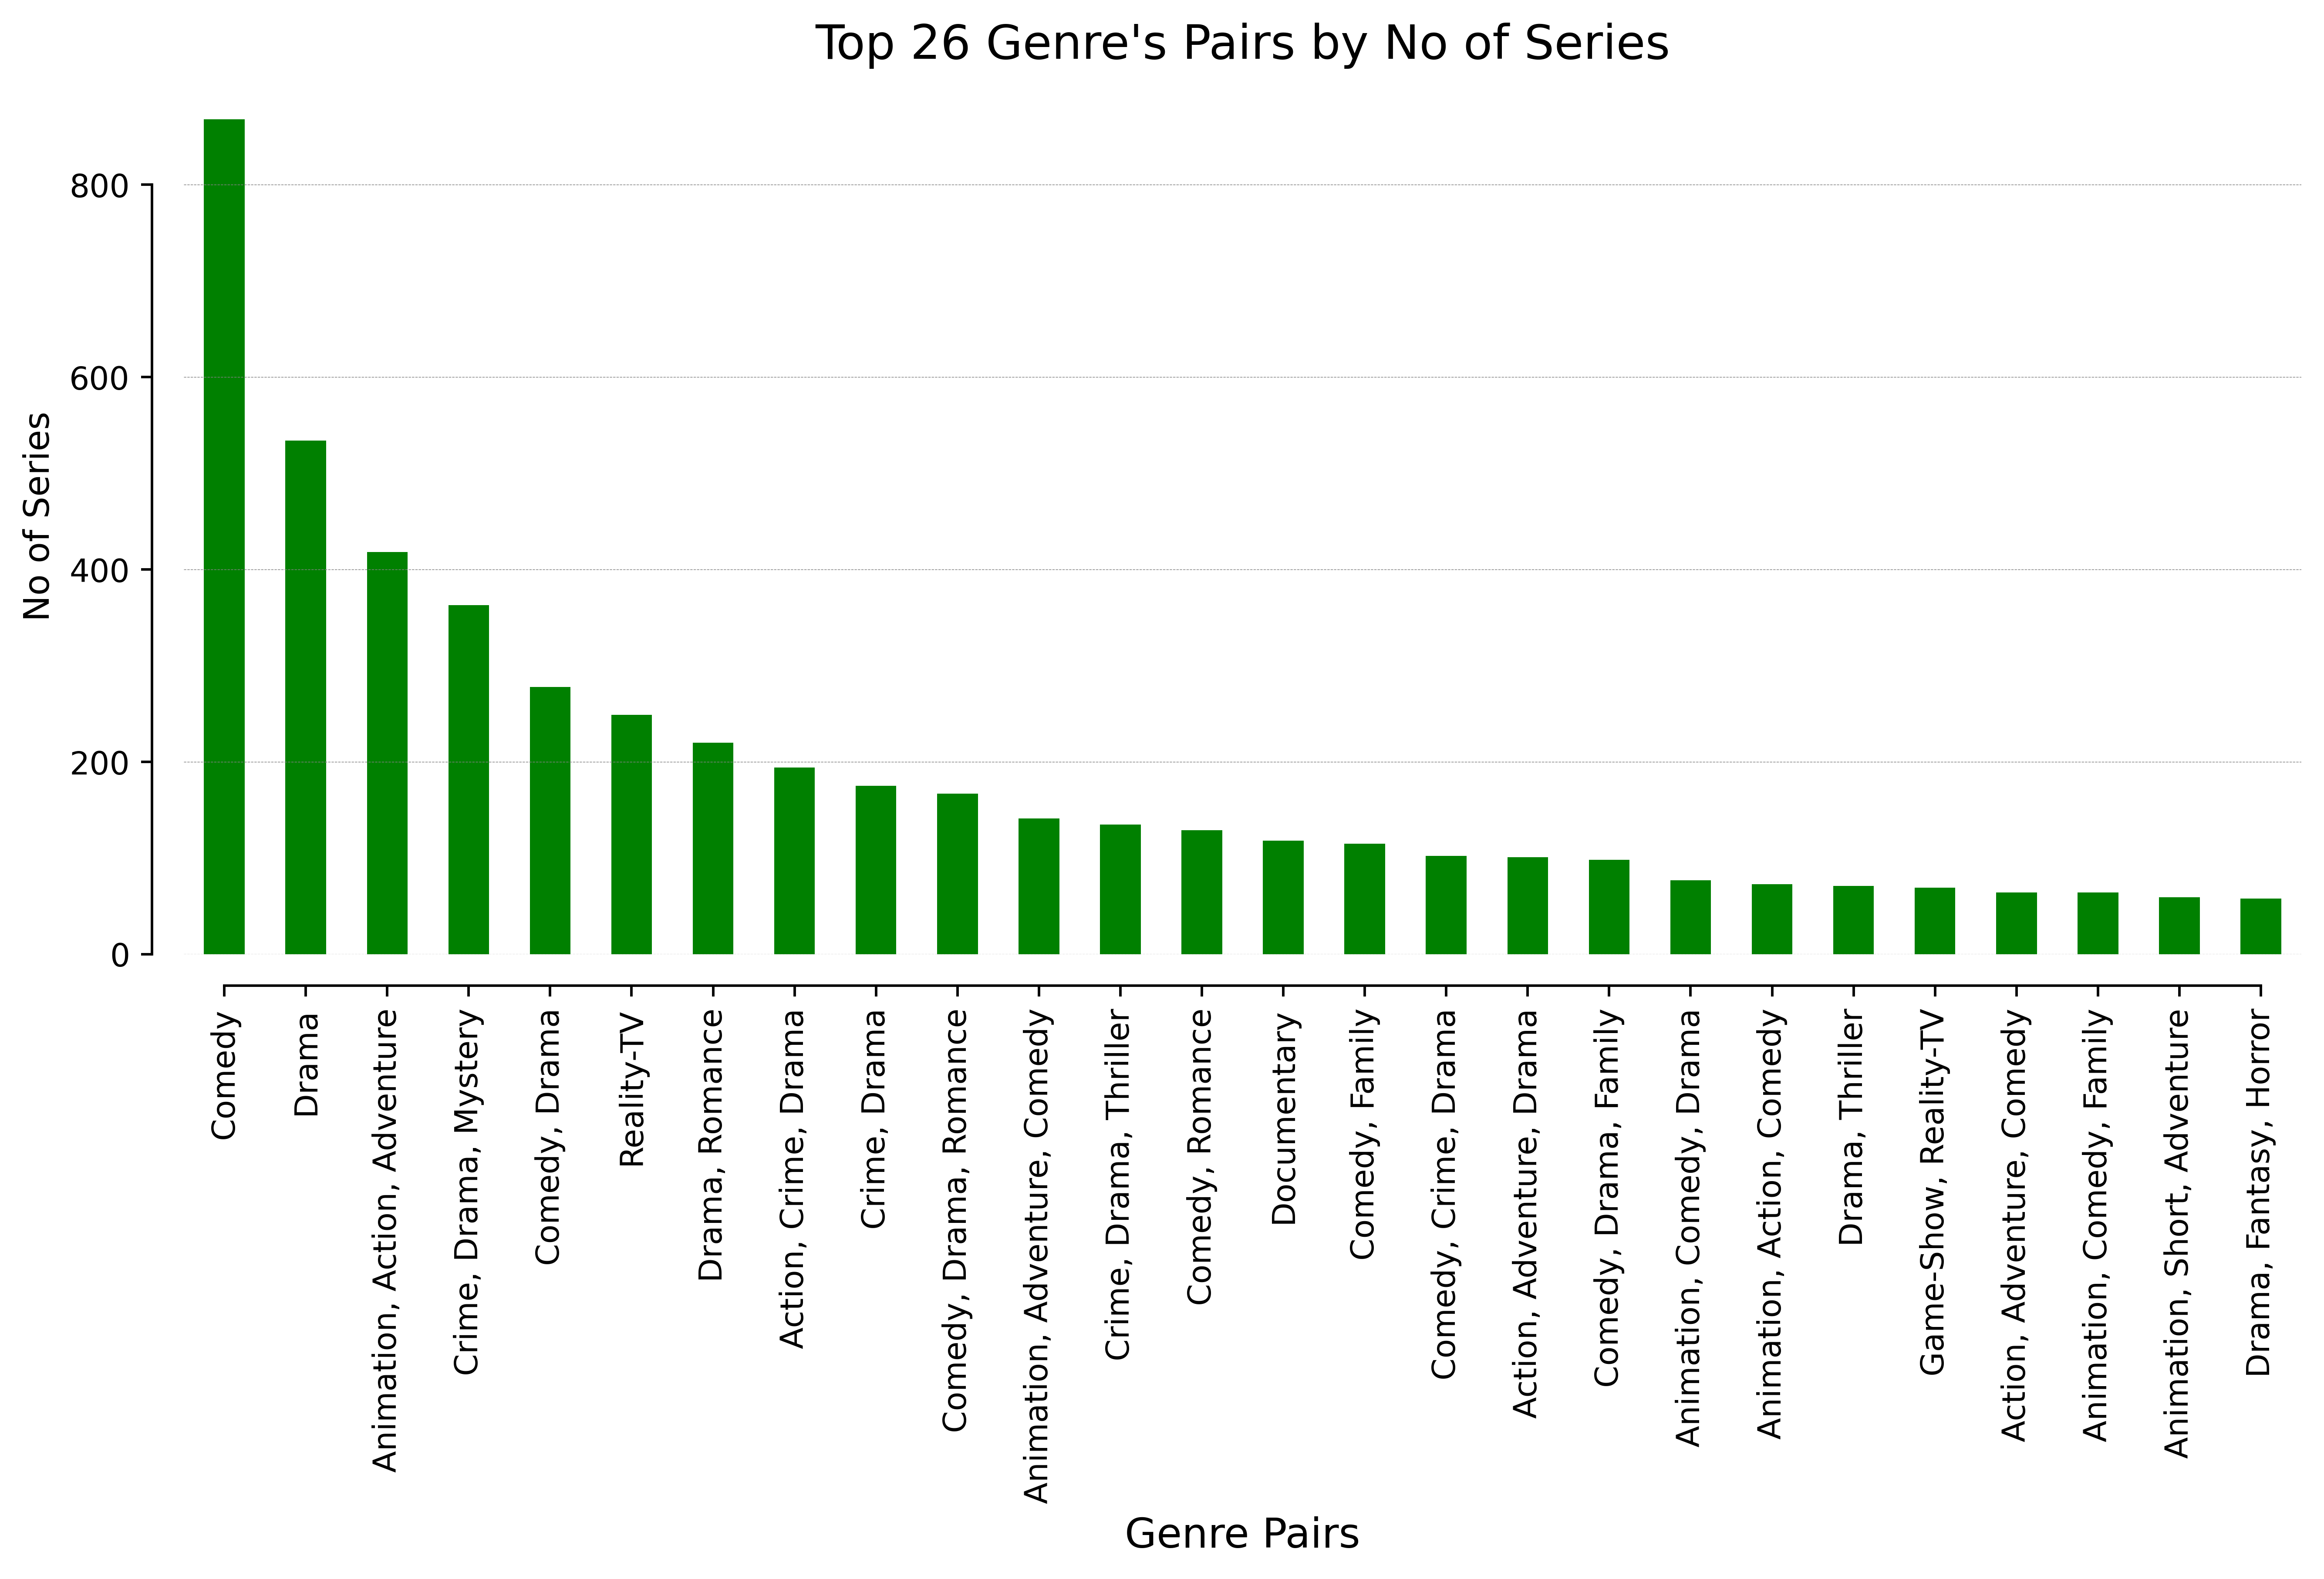

In [143]:
# Lets plot top Genre pairs by no of series



# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                   

# Quick bar plot with pandas
df.Genre.value_counts()[:26].plot(kind='bar', color = 'g')          

# Set horizontal grid lines
plt.grid(True, axis = 'y',                                            
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')      

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim= True)  

# Rotate the x tick value by 90 degree
plt.xticks(rotation = 90)                                             

plt.xlabel("Genre Pairs", fontsize = 13)                           # Set X label         
plt.ylabel("No of Series", fontsize = 11)                                   # Set Y label
plt.title("Top 26 Genre's Pairs by No of Series", fontsize = 15)        # Set title
plt.show()

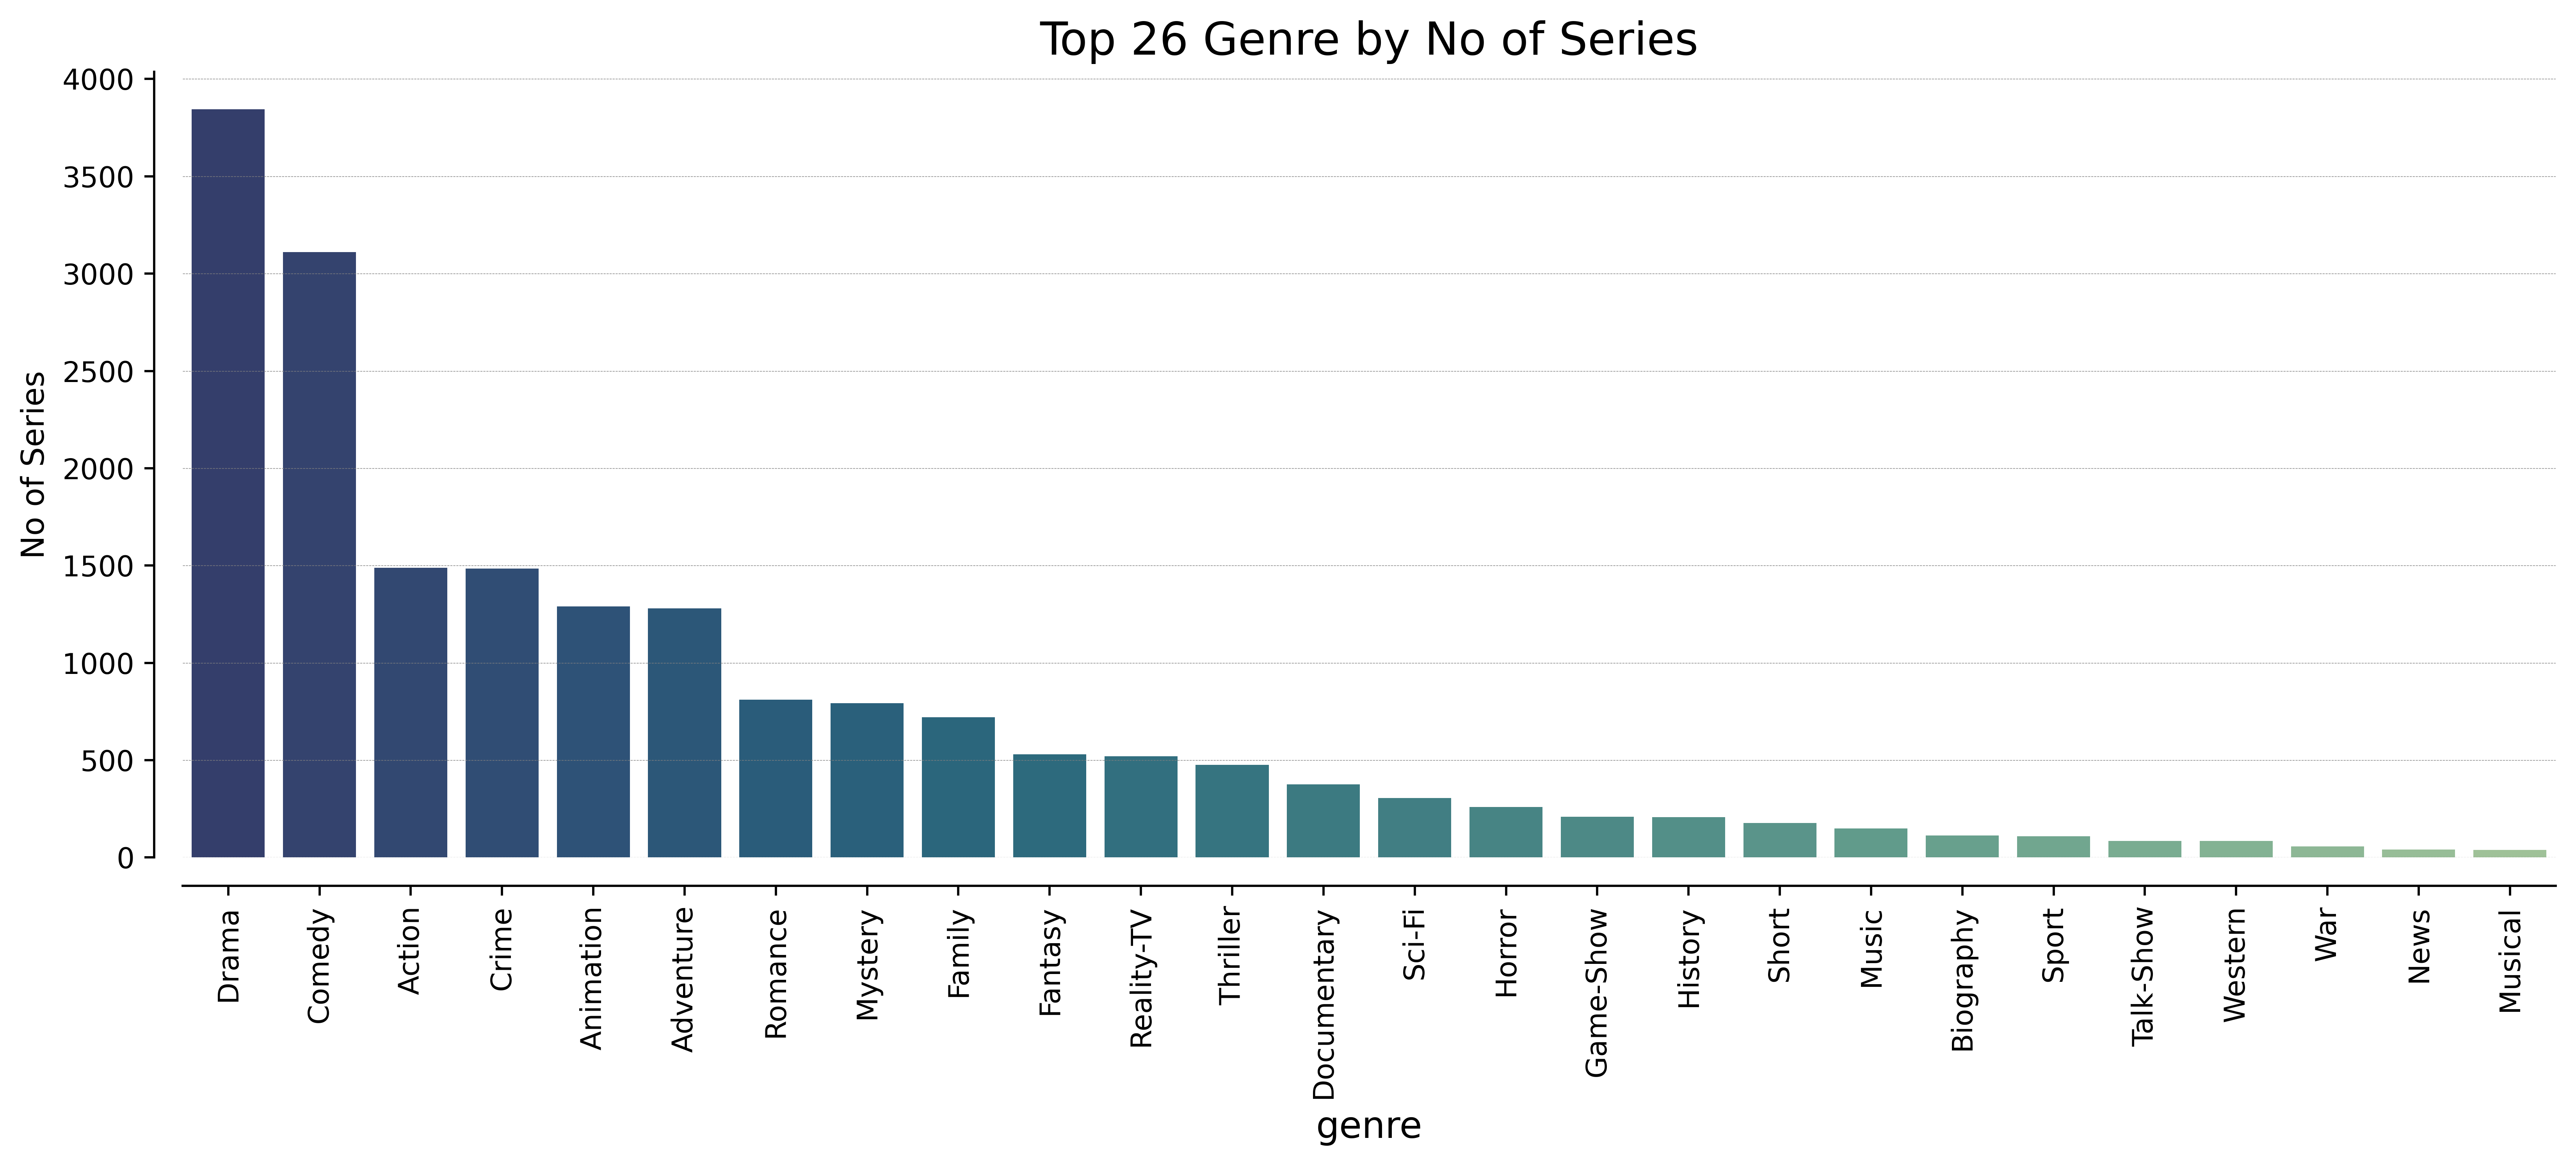

In [123]:
# Now plot unique genre by no of series



# Adjust the size and view of plot
plt.figure(figsize=(15,5), dpi=523)                                       
#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = Genres.sort_values('series_counts', ascending=False),   
           x='genre',
           y = 'series_counts',
           palette= "crest_r"#'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("genre", fontsize = 13)                             # Set X label         
plt.ylabel("No of Series", fontsize = 11)                      # Set Y label
plt.title('Top 26 Genre by No of Series', fontsize = 16)         # Set title
plt.show()

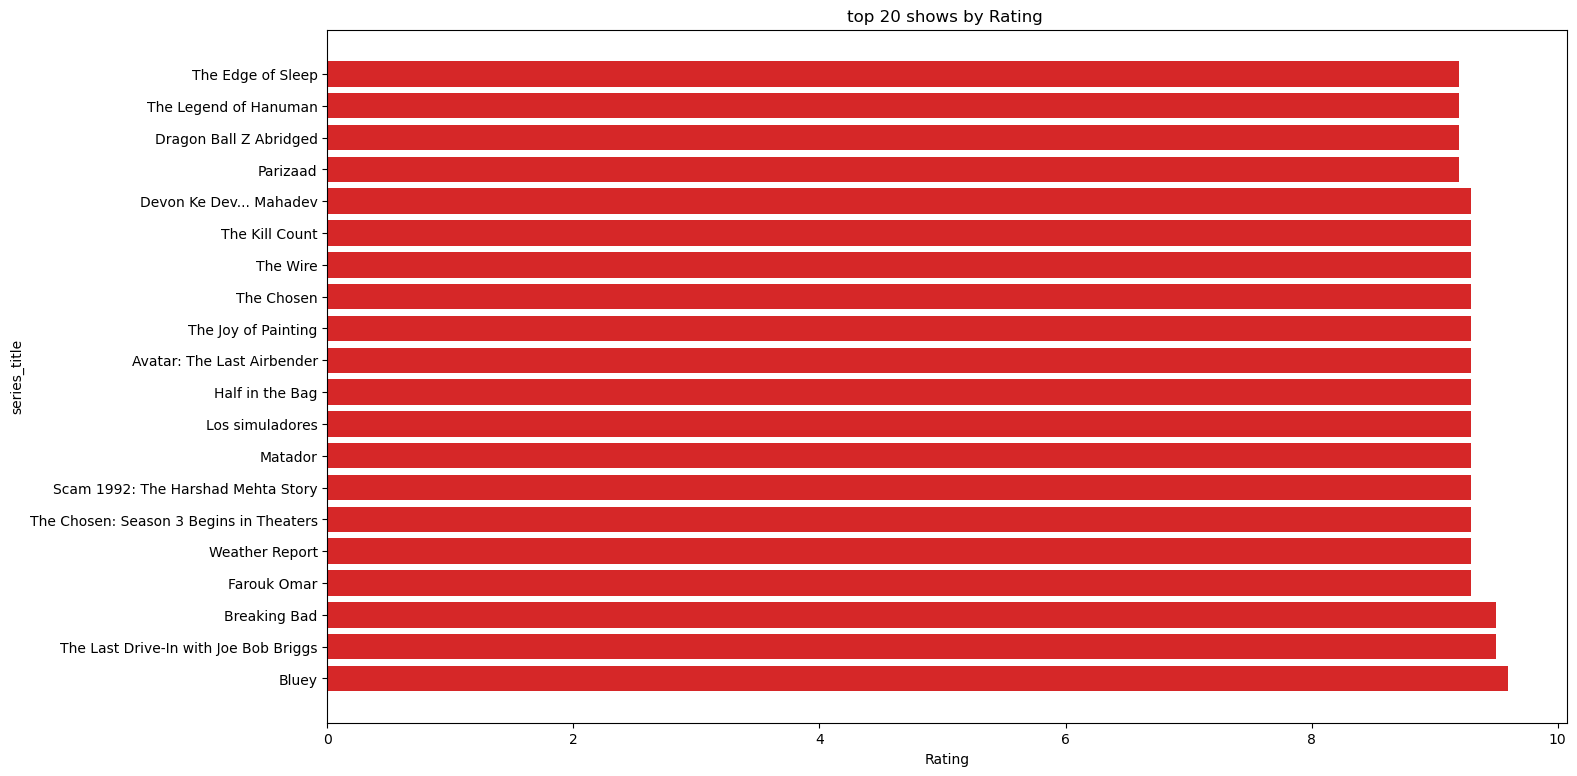

<Figure size 640x480 with 0 Axes>

In [141]:
# Now lets plot top shows by rating



series_title = df_sr['series_title']
Rating = df_sr['Rating']
 

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(series_title, Rating,color='tab:red')
 
plt.xlabel("Rating")
plt.ylabel("series_title")
plt.title("top 20 shows by Rating ")
plt.show()
plt.tight_layout()

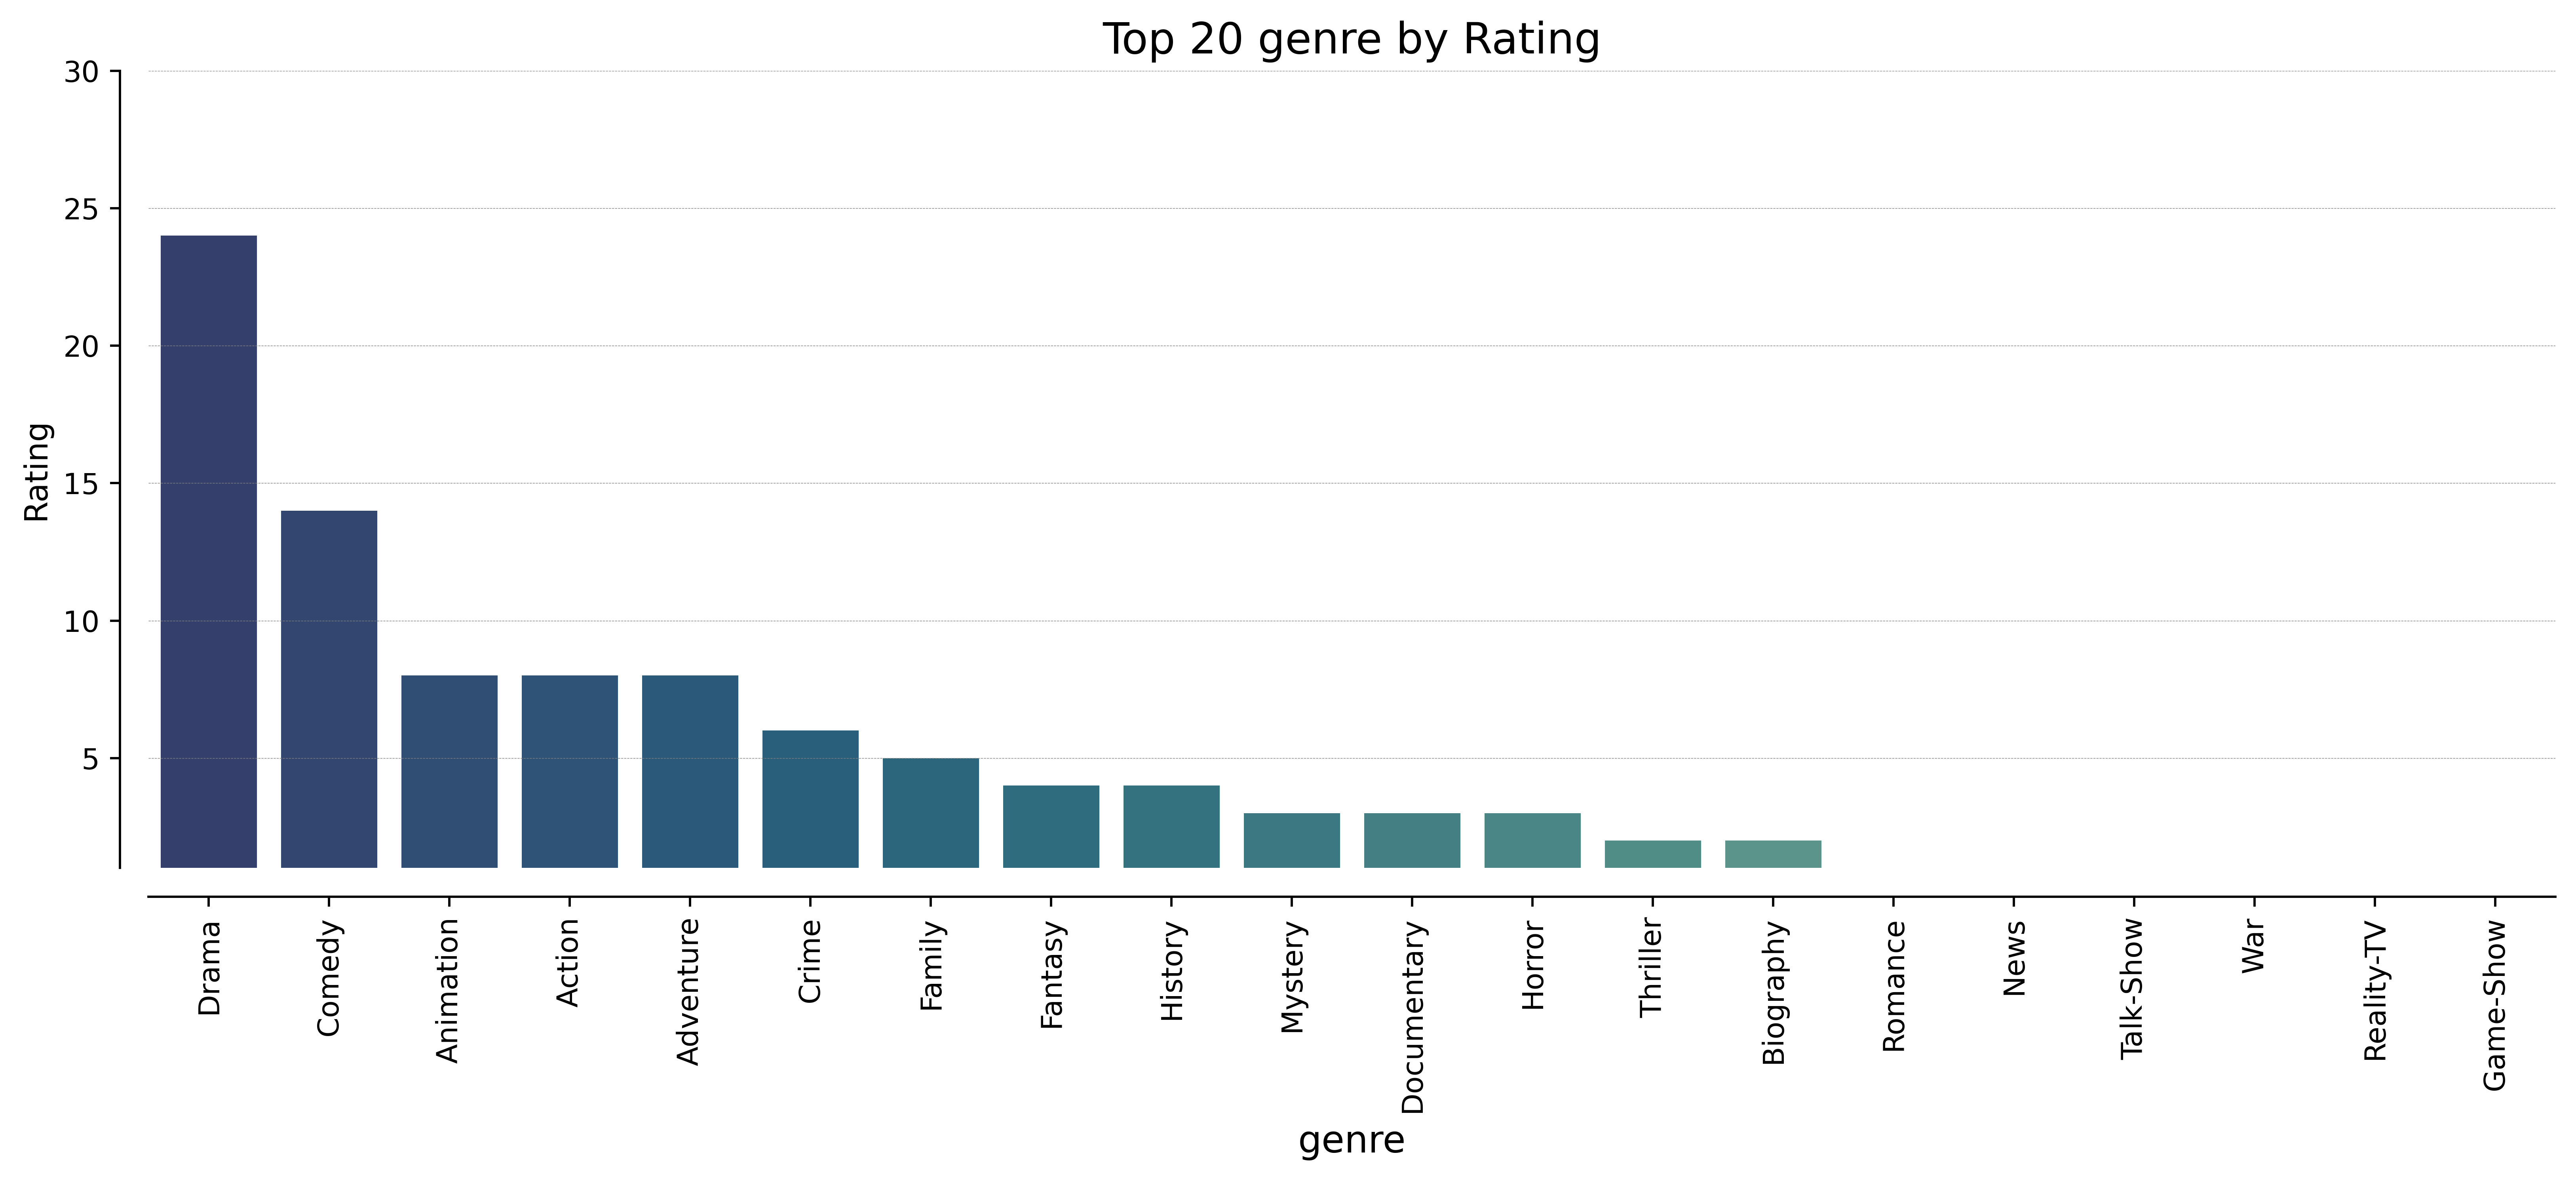

In [104]:
# Now lets plot top unique genre by rating



# Adjust the size and view of plot
plt.figure(figsize=(15,5), dpi=523)                                       
#sns.set_style('whitegrid') 

# Set Y limit value 
plt.ylim(1, 30)                               

# Seaborn Bar plot
sns.barplot(x=df_hrc.genre.values,           
           y=df_hrc.highrate_counts.values,
           data=df_hrc,
           color ='green',
           palette= "crest_r"
          )  

# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("genre", fontsize = 13)                             # Set X label         
plt.ylabel("Rating", fontsize = 11)                             # Set Y label
plt.title('Top 20 genre by Rating', fontsize = 15)            # Set title
plt.show()

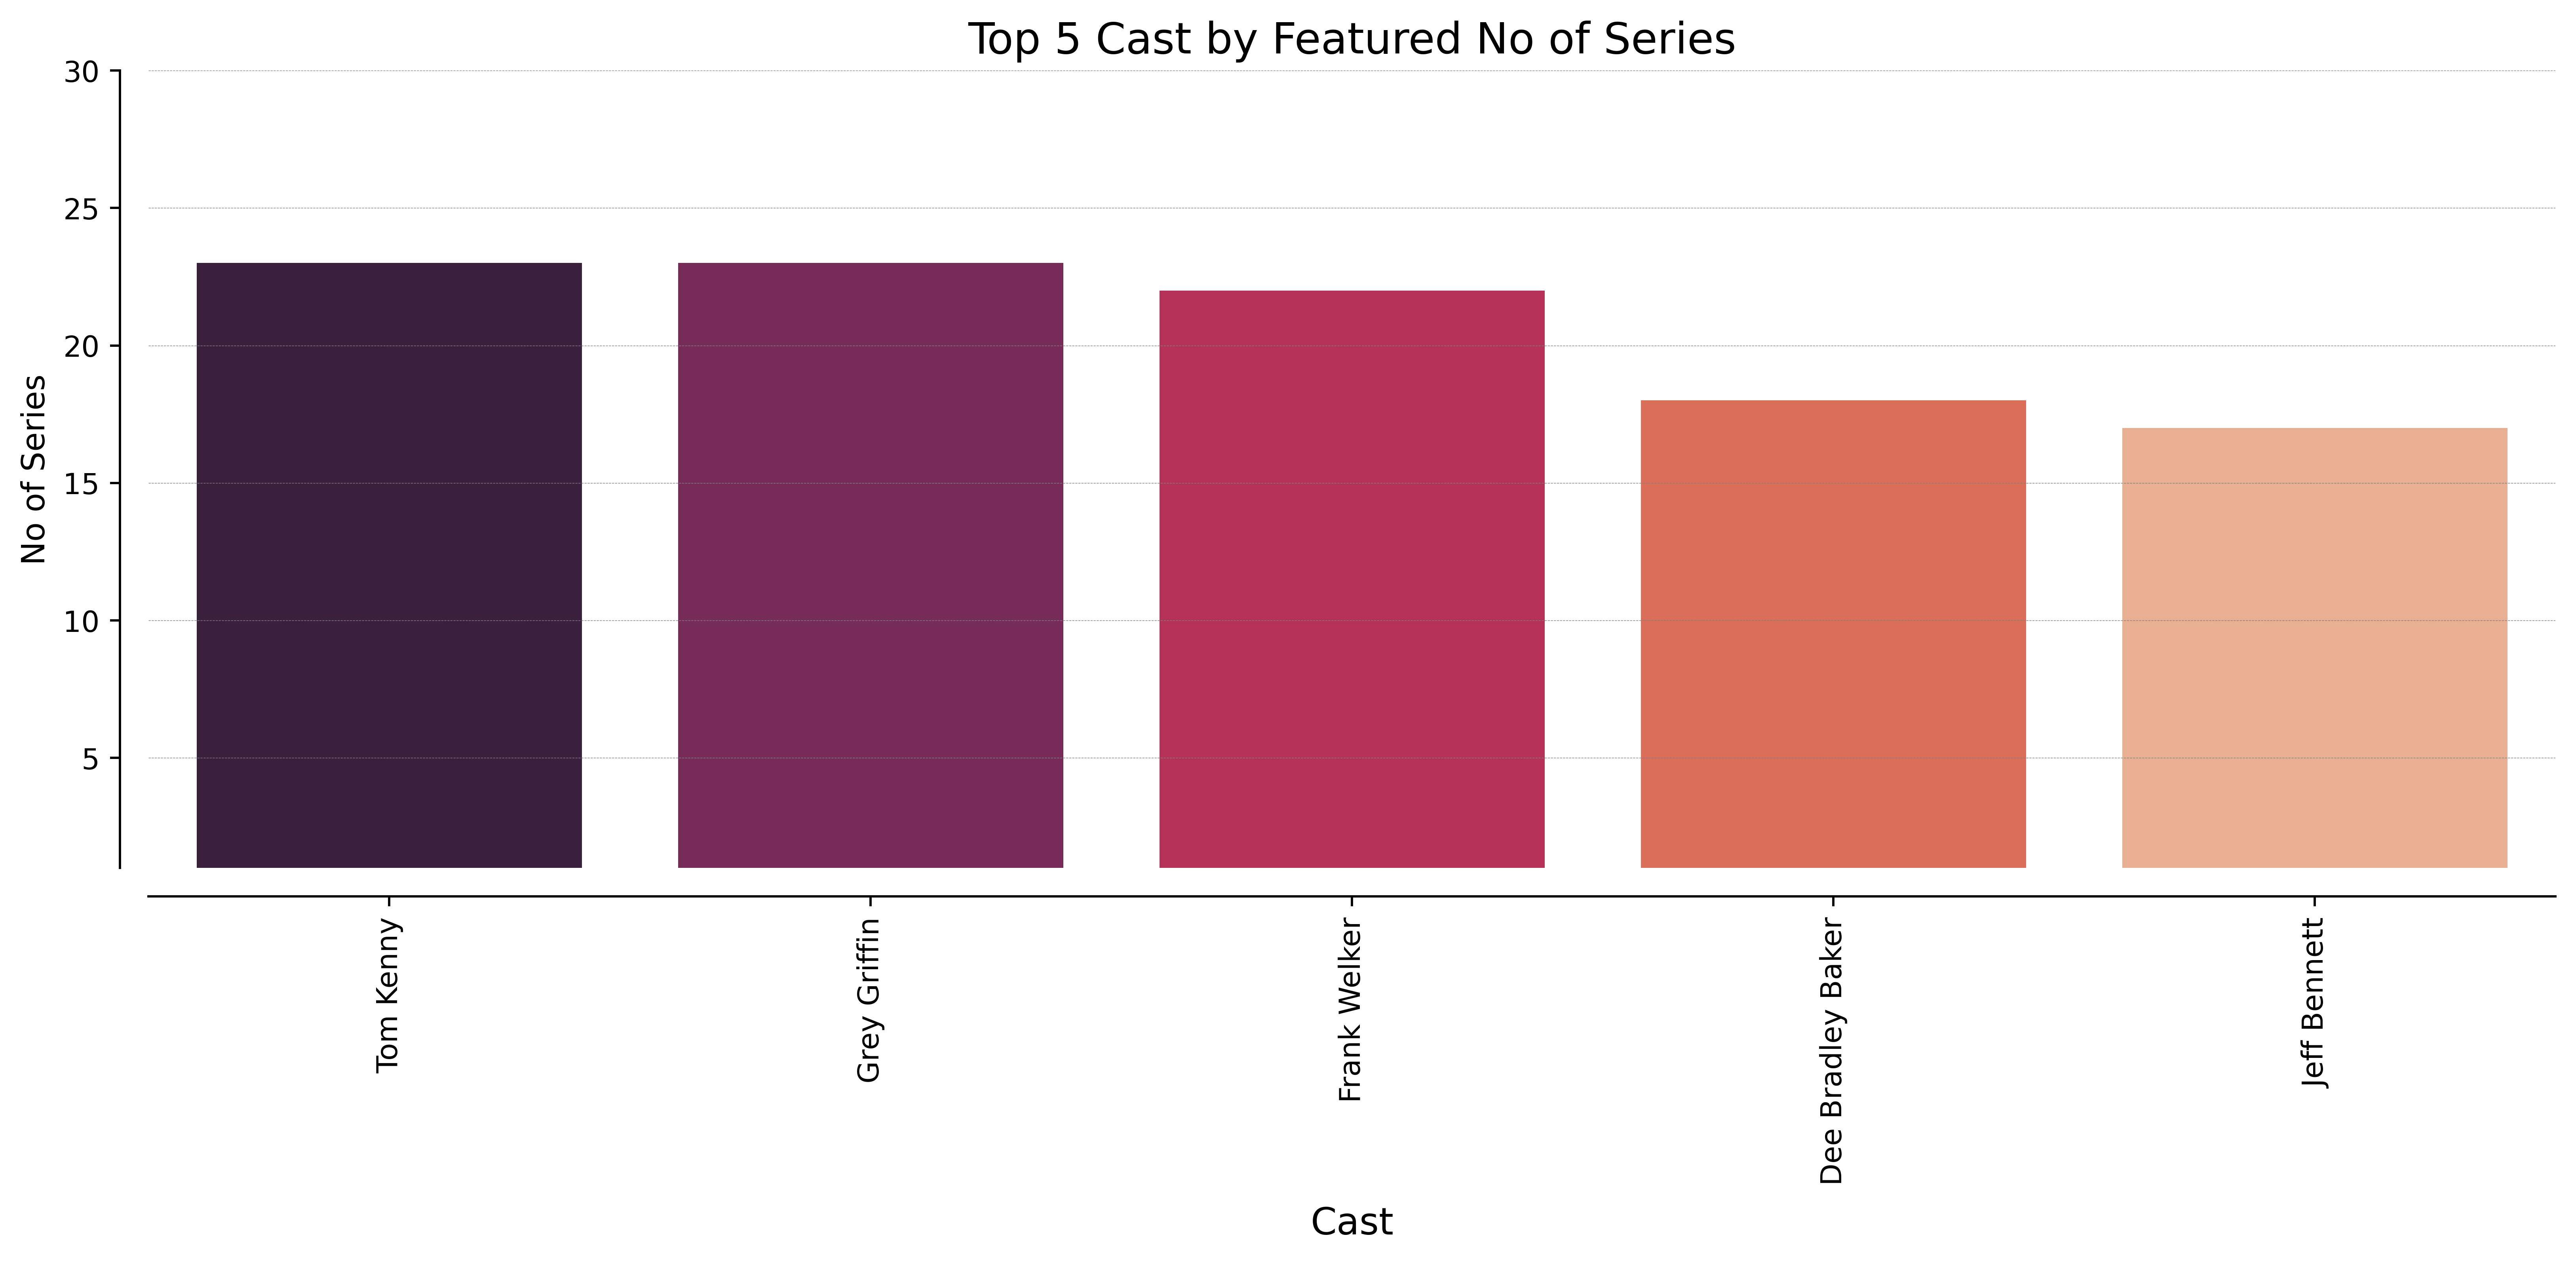

In [145]:
# Now lets plot top cast based on no of series they featured in



# Adjust the size and view of plot
plt.figure(figsize=(15,5), dpi=523)                                       
#sns.set_style('whitegrid') 

# Set Y limit value 
plt.ylim(1, 30)                               

# Seaborn Bar plot
sns.barplot(x=top_cast.cast.values,           
           y=top_cast.series_count.values,
           data=top_cast,
           color ='magenta',
           palette= "rocket"
          )  

# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Cast", fontsize = 13)                             # Set X label         
plt.ylabel("No of Series", fontsize = 11)                             # Set Y label
plt.title('Top 5 Cast by Featured No of Series', fontsize = 15)            # Set title
plt.show()

<AxesSubplot:>

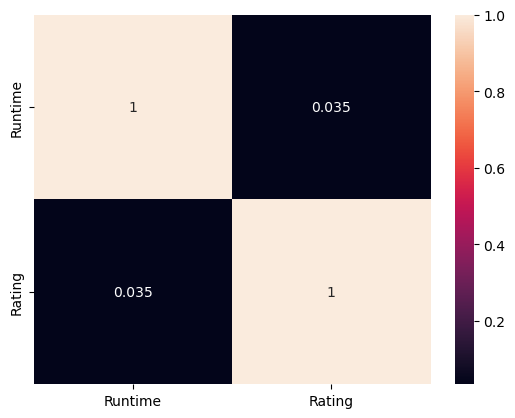

In [142]:
# Lets see if there is any correlation between 'Rating' and 'Runtime'

sns.heatmap(df.corr(),annot=True)